In [3]:
import os

In [13]:
os.getcwd()

'C:\\Users\\MSI MODERN\\Desktop\\datathon final'

In [12]:
%cd C:\Users\MSI MODERN\Desktop\datathon final

C:\Users\MSI MODERN\Desktop\datathon final


In [80]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [81]:
df = pd.read_csv('Dataset.csv')

In [82]:
rows, columns = df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 9321
Number of columns: 33


## Cleaning

In [83]:
# Check for missing values
df.isnull().sum()

Location               0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          3868
snow                   0
snowdepth           1844
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk           348
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [84]:
# Remove specified columns ('preciptype,snowdepth' and 'severerisk') from the DataFrame
columns_to_remove = ['snowdepth','preciptype', 'severerisk']
df = df.drop(columns=columns_to_remove)

In [85]:
# Check data types of all columns in the DataFrame
df.dtypes

Location             object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
snow                float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [86]:
df

,Location,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hobart,10/3/2022,13.6,8.8,11.0,13.6,6.8,10.7,6.2,72.9,...,119.1,10.2,5,2022-10-03T06:41:10,2022-10-03T19:19:21,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"94975099999,94970099999,94951099999,9597209999..."
1,Hobart,10/4/2022,11.3,6.5,9.0,11.3,4.4,7.4,1.0,58.5,...,174.5,15.0,8,2022-10-04T06:39:24,2022-10-04T19:20:30,0.29,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"94975099999,94970099999,94977099999,9596209999..."
2,Hobart,10/5/2022,12.1,4.1,8.9,12.1,1.4,8.0,2.4,64.6,...,211.2,18.2,8,2022-10-05T06:37:39,2022-10-05T19:21:38,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"94975099999,94970099999,94951099999,9597209999..."
3,Hobart,10/7/2022,21.6,12.3,14.6,21.6,12.3,14.6,11.0,80.4,...,87.4,7.6,5,2022-10-07T06:34:09,2022-10-07T19:23:56,0.40,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"94975099999,94970099999,94951099999,9597209999..."
4,Hobart,10/8/2022,15.5,6.8,11.3,15.5,5.0,10.7,2.0,53.8,...,156.6,13.5,6,2022-10-08T06:32:25,2022-10-08T19:25:06,0.43,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"94975099999,94970099999,94951099999,9597209999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,gold coast,12/23/2022,82.2,68.8,74.8,84.4,68.8,75.2,63.4,68.6,...,225.4,19.4,8,2022-12-23T04:47:38,2022-12-23T18:42:42,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"94578099999,94575099999,E9515,YBCG,D8022,E5925..."
9317,gold coast,12/24/2022,77.2,69.4,72.8,77.2,69.4,72.8,67.0,82.2,...,66.3,5.7,3,2022-12-24T04:48:09,2022-12-24T18:43:09,0.02,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"94575099999,E9515,YBCG,D8022,E5925,94576099999..."
9318,gold coast,12/25/2022,80.0,68.7,74.2,80.0,68.7,74.2,68.0,81.6,...,208.5,17.9,8,2022-12-25T04:48:42,2022-12-25T18:43:35,0.06,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"94578099999,94575099999,E9515,YBCG,D8022,E5925..."
9319,gold coast,12/26/2022,79.5,71.3,74.8,79.5,71.3,74.8,66.3,75.1,...,242.0,20.8,8,2022-12-26T04:49:16,2022-12-26T18:44:00,0.09,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"94578099999,94575099999,E9515,YBCG,D8022,94576..."


In [87]:
columns_to_show_unique = ['conditions', 'description', 'icon', 'stations']

# Loop through each column and print unique values
for column in columns_to_show_unique:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'conditions':
['Partially cloudy' 'Rain, Partially cloudy' 'Rain, Overcast' 'Overcast'
 'Clear' 'Rain' 'Snow, Rain, Partially cloudy' 'Snow, Rain, Overcast'
 'Snow, Rain']


Unique values in 'description':
['Partly cloudy throughout the day.'
 'Partly cloudy throughout the day with rain.'
 'Partly cloudy throughout the day with afternoon rain.'
 'Partly cloudy throughout the day with late afternoon rain.'
 'Partly cloudy throughout the day with morning rain.'
 'Cloudy skies throughout the day with rain.' 'Clearing in the afternoon.'
 'Becoming cloudy in the afternoon.'
 'Partly cloudy throughout the day with early morning rain.'
 'Cloudy skies throughout the day with a chance of rain throughout the day.'
 'Partly cloudy throughout the day with a chance of rain throughout the day.'
 'Cloudy skies throughout the day.'
 'Cloudy skies throughout the day with rain in the morning and afternoon.'
 'Cloudy skies throughout the day with morning rain.'
 'Clear conditions through

In [88]:
df = df.drop(columns=columns_to_show_unique)

In [89]:
df

,Location,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase
0,Hobart,10/3/2022,13.6,8.8,11.0,13.6,6.8,10.7,6.2,72.9,...,136.6,1018.9,85.0,11.2,119.1,10.2,5,2022-10-03T06:41:10,2022-10-03T19:19:21,0.25
1,Hobart,10/4/2022,11.3,6.5,9.0,11.3,4.4,7.4,1.0,58.5,...,181.3,1026.8,59.7,10.6,174.5,15.0,8,2022-10-04T06:39:24,2022-10-04T19:20:30,0.29
2,Hobart,10/5/2022,12.1,4.1,8.9,12.1,1.4,8.0,2.4,64.6,...,65.6,1034.0,80.2,11.8,211.2,18.2,8,2022-10-05T06:37:39,2022-10-05T19:21:38,0.33
3,Hobart,10/7/2022,21.6,12.3,14.6,21.6,12.3,14.6,11.0,80.4,...,347.1,1007.0,87.9,10.3,87.4,7.6,5,2022-10-07T06:34:09,2022-10-07T19:23:56,0.40
4,Hobart,10/8/2022,15.5,6.8,11.3,15.5,5.0,10.7,2.0,53.8,...,306.5,1012.2,37.5,11.8,156.6,13.5,6,2022-10-08T06:32:25,2022-10-08T19:25:06,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,gold coast,12/23/2022,82.2,68.8,74.8,84.4,68.8,75.2,63.4,68.6,...,352.3,1013.5,74.2,6.2,225.4,19.4,8,2022-12-23T04:47:38,2022-12-23T18:42:42,0.00
9317,gold coast,12/24/2022,77.2,69.4,72.8,77.2,69.4,72.8,67.0,82.2,...,324.4,1012.2,96.1,6.2,66.3,5.7,3,2022-12-24T04:48:09,2022-12-24T18:43:09,0.02
9318,gold coast,12/25/2022,80.0,68.7,74.2,80.0,68.7,74.2,68.0,81.6,...,103.9,1014.7,78.1,6.3,208.5,17.9,8,2022-12-25T04:48:42,2022-12-25T18:43:35,0.06
9319,gold coast,12/26/2022,79.5,71.3,74.8,79.5,71.3,74.8,66.3,75.1,...,127.9,1019.5,72.4,6.7,242.0,20.8,8,2022-12-26T04:49:16,2022-12-26T18:44:00,0.09


In [90]:
df.dtypes

Location             object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
snow                float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
sunrise              object
sunset               object
moonphase           float64
dtype: object

In [91]:
unique_values = df['Location'].unique()
print(unique_values)

['Hobart' 'adelaide' 'orange' 'Bunbury' 'canberra' 'darwin' 'canterbury'
 'newcastle' 'gold coast' 'launceston' 'wagga wagga' 'perth' 'brisbane'
 'Sydney' 'melbourne' 'Toowoomba' 'Ballarat' 'cairns' 'townsville'
 'geelong' 'wollongong ']


In [92]:
unique_values = df['moonphase'].unique()
print(unique_values)

[0.25 0.29 0.33 0.4  0.43 0.47 0.5  0.54 0.57 0.6  0.63 0.67 0.7  0.73
 0.75 0.79 0.83 0.86 0.89 0.92 0.95 0.   0.02 0.06 0.09 0.13 0.16 0.2
 0.27 0.31 0.34 0.38 0.41 0.45 0.52 0.55 0.58 0.62 0.65 0.68 0.71 0.74
 0.81 0.84 0.87 0.91 0.94 0.97 0.04 0.07 0.11 0.14 0.18 0.21 0.28 0.32
 0.35 0.39 0.46 0.53 0.56 0.59 0.66 0.69 0.82 0.12 0.19 0.26 0.3  0.37
 0.64 0.8  0.17 0.44 0.48 0.61 0.72 0.85 0.96 0.42 0.98 0.78 0.93 0.03
 0.22 0.05 0.08 0.24 0.23 0.36 0.77 0.9  0.88 0.15 0.76 0.1 ]


In [93]:
df['datetime'] = pd.to_datetime(df['datetime'])
# Create a new column 'month_column' with the month extracted from 'datetime             '
df['month_column'] = df['datetime'].dt.month


In [94]:
df.head(10)

,Location,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month_column
0,Hobart,2022-10-03,13.6,8.8,11.0,13.6,6.8,10.7,6.2,72.9,...,1018.9,85.0,11.2,119.1,10.2,5,2022-10-03T06:41:10,2022-10-03T19:19:21,0.25,10
1,Hobart,2022-10-04,11.3,6.5,9.0,11.3,4.4,7.4,1.0,58.5,...,1026.8,59.7,10.6,174.5,15.0,8,2022-10-04T06:39:24,2022-10-04T19:20:30,0.29,10
2,Hobart,2022-10-05,12.1,4.1,8.9,12.1,1.4,8.0,2.4,64.6,...,1034.0,80.2,11.8,211.2,18.2,8,2022-10-05T06:37:39,2022-10-05T19:21:38,0.33,10
3,Hobart,2022-10-07,21.6,12.3,14.6,21.6,12.3,14.6,11.0,80.4,...,1007.0,87.9,10.3,87.4,7.6,5,2022-10-07T06:34:09,2022-10-07T19:23:56,0.40,10
4,Hobart,2022-10-08,15.5,6.8,11.3,15.5,5.0,10.7,2.0,53.8,...,1012.2,37.5,11.8,156.6,13.5,6,2022-10-08T06:32:25,2022-10-08T19:25:06,0.43,10
5,Hobart,2022-10-09,13.8,3.3,-8.2,13.8,1.4,7.4,2.3,67.7,...,1021.7,38.3,12.4,205.5,17.7,8,2022-10-09T06:30:42,2022-10-09T19:26:15,0.47,10
6,Hobart,2022-10-10,16.6,5.1,11.0,16.6,2.3,10.4,5.3,69.8,...,1022.5,53.6,12.9,196.6,17.1,9,2022-10-10T06:28:59,2022-10-10T19:27:25,0.50,10
7,Hobart,2022-10-11,19.3,8.1,13.4,19.3,7.6,13.3,7.7,70.3,...,1022.8,80.0,10.6,202.4,17.5,7,2022-10-11T06:27:17,2022-10-11T19:28:36,0.54,10
8,Hobart,2022-10-12,18.3,10.6,15.0,18.3,10.6,15.0,9.6,70.4,...,1020.0,67.9,10.6,120.6,10.5,4,2022-10-12T06:25:35,2022-10-12T19:29:47,0.57,10
9,Hobart,2022-10-13,25.7,14.5,16.3,25.7,14.5,16.3,12.3,77.2,...,1009.9,97.0,11.0,28.8,2.4,1,2022-10-13T06:23:54,2022-10-13T19:30:58,0.60,10


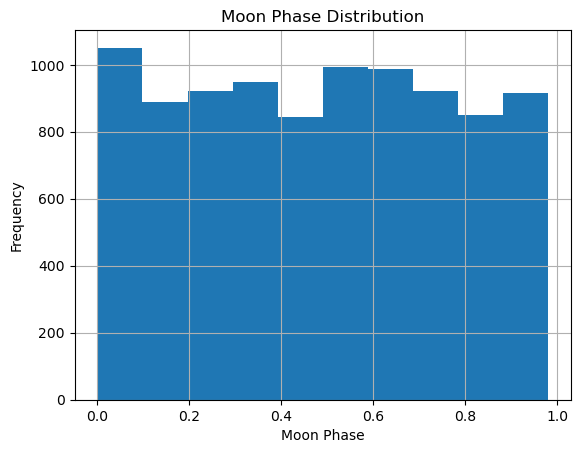

In [95]:
# Create a histogram for the 'moonphase' column
df['moonphase'].hist()

# Set labels and title
plt.xlabel('Moon Phase')
plt.ylabel('Frequency')
plt.title('Moon Phase Distribution')

# Show the plot
plt.show()

In [96]:
# Create bins and labels
bins = [-0.01, 0.25, 0.5, 0.75, 1.01]  # Adjusted the upper bound of the last bin
labels = ['New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']

# Cut 'moonphase' into the specified bins and labels
df['moonphase_category'] = pd.cut(df['moonphase'], bins=bins, labels=labels, include_lowest=True)

# Display the result
print(df[['moonphase', 'moonphase_category']])

      moonphase moonphase_category
0          0.25           New Moon
1          0.29      First Quarter
2          0.33      First Quarter
3          0.40      First Quarter
4          0.43      First Quarter
...         ...                ...
9316       0.00           New Moon
9317       0.02           New Moon
9318       0.06           New Moon
9319       0.09           New Moon
9320       0.13           New Moon

[9321 rows x 2 columns]


In [97]:
df

,Location,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month_column,moonphase_category
0,Hobart,2022-10-03,13.6,8.8,11.0,13.6,6.8,10.7,6.2,72.9,...,85.0,11.2,119.1,10.2,5,2022-10-03T06:41:10,2022-10-03T19:19:21,0.25,10,New Moon
1,Hobart,2022-10-04,11.3,6.5,9.0,11.3,4.4,7.4,1.0,58.5,...,59.7,10.6,174.5,15.0,8,2022-10-04T06:39:24,2022-10-04T19:20:30,0.29,10,First Quarter
2,Hobart,2022-10-05,12.1,4.1,8.9,12.1,1.4,8.0,2.4,64.6,...,80.2,11.8,211.2,18.2,8,2022-10-05T06:37:39,2022-10-05T19:21:38,0.33,10,First Quarter
3,Hobart,2022-10-07,21.6,12.3,14.6,21.6,12.3,14.6,11.0,80.4,...,87.9,10.3,87.4,7.6,5,2022-10-07T06:34:09,2022-10-07T19:23:56,0.40,10,First Quarter
4,Hobart,2022-10-08,15.5,6.8,11.3,15.5,5.0,10.7,2.0,53.8,...,37.5,11.8,156.6,13.5,6,2022-10-08T06:32:25,2022-10-08T19:25:06,0.43,10,First Quarter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,gold coast,2022-12-23,82.2,68.8,74.8,84.4,68.8,75.2,63.4,68.6,...,74.2,6.2,225.4,19.4,8,2022-12-23T04:47:38,2022-12-23T18:42:42,0.00,12,New Moon
9317,gold coast,2022-12-24,77.2,69.4,72.8,77.2,69.4,72.8,67.0,82.2,...,96.1,6.2,66.3,5.7,3,2022-12-24T04:48:09,2022-12-24T18:43:09,0.02,12,New Moon
9318,gold coast,2022-12-25,80.0,68.7,74.2,80.0,68.7,74.2,68.0,81.6,...,78.1,6.3,208.5,17.9,8,2022-12-25T04:48:42,2022-12-25T18:43:35,0.06,12,New Moon
9319,gold coast,2022-12-26,79.5,71.3,74.8,79.5,71.3,74.8,66.3,75.1,...,72.4,6.7,242.0,20.8,8,2022-12-26T04:49:16,2022-12-26T18:44:00,0.09,12,New Moon


In [98]:
df = df.drop('moonphase', axis=1)

## EDA

In [99]:
df.shape

(9321, 27)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9321 entries, 0 to 9320
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Location            9321 non-null   object        
 1   datetime            9321 non-null   datetime64[ns]
 2   tempmax             9321 non-null   float64       
 3   tempmin             9321 non-null   float64       
 4   temp                9321 non-null   float64       
 5   feelslikemax        9321 non-null   float64       
 6   feelslikemin        9321 non-null   float64       
 7   feelslike           9321 non-null   float64       
 8   dew                 9321 non-null   float64       
 9   humidity            9321 non-null   float64       
 10  precip              9321 non-null   float64       
 11  precipprob          9321 non-null   int64         
 12  precipcover         9321 non-null   float64       
 13  snow                9321 non-null   float64     

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tempmax,9321.0,57.341229,22.983962,7.6,31.9,65.3,74.600,103.400
tempmin,9321.0,43.048750,19.644097,-6.0,24.7,49.1,58.400,78.000
temp,9321.0,49.897039,21.043000,-16.3,27.8,57.3,66.000,167.000
feelslikemax,9321.0,57.722787,22.541598,4.8,36.7,65.3,74.600,106.900
feelslikemin,9321.0,42.291643,19.979744,-9.1,24.6,47.5,58.400,78.000
feelslike,9321.0,49.791149,20.901319,-0.9,30.2,57.1,66.000,89.600
dew,9321.0,40.516243,18.914092,-2.2,23.4,46.4,54.500,75.000
humidity,9321.0,70.979101,12.236543,11.7,64.1,72.1,79.400,99.900
precip,9321.0,0.936519,6.411360,0.0,0.0,0.0,0.066,332.497
precipprob,9321.0,46.808282,49.900702,0.0,0.0,0.0,100.000,100.000


In [ ]:
# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as the index for time-based analysis
df.set_index('datetime', inplace=True)

# Check for consistency over time
plt.figure(figsize=(14, 6))
sns.lineplot(x=df.index, y='temp', data=df, label='Temperature')
sns.lineplot(x=df.index, y='precip', data=df, label='Precipitation', linestyle='dashed')
plt.title('Temperature and Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
df.info()